In [3]:
import pandas as pd

IsPlaced_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\is_placed.csv")
IsPlaced_DF.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Distribution plot of CGPA")
sns.histplot(IsPlaced_DF.cgpa,kde=True)

plt.subplot(1,2,2)
plt.title("Distribution plot of Placement Exam Marks")
sns.histplot(IsPlaced_DF.placement_exam_marks,kde=True)

In [29]:
# Check the skewnes of IsPlaced_DF.cgpa
IsPlaced_DF.cgpa.skew()

-0.014529938929314918

In [27]:
# Check the skewnes of IsPlaced_DF.placement_exam_marks
IsPlaced_DF.placement_exam_marks.skew()

0.8356419499466834

In [39]:
#Mean, Min, Max and SD values of cgpa and placement_exam_marks before outlier deletion.

MeanCGPA = IsPlaced_DF.cgpa.mean()
MinCGPA = IsPlaced_DF.cgpa.min()
MaxCGPA = IsPlaced_DF.cgpa.max()
SDCGPA = IsPlaced_DF.cgpa.std()

MeanPEM = IsPlaced_DF.placement_exam_marks.mean()
MinPEM = IsPlaced_DF.placement_exam_marks.min()
MaxPEM = IsPlaced_DF.placement_exam_marks.max()
SDPEM = IsPlaced_DF.placement_exam_marks.std()

print("Mean value of cgpa is ",MeanCGPA)
print("Min value of cgpa is ",MinCGPA)
print("Max value of cgpa is ",MaxCGPA)
print("SD value of cgpa is ",SDCGPA)
print("Mean value of placement_exam_marks is ",MeanPEM)
print("Min value of placement_exam_marks is ",MinPEM)
print("Max value of placement_exam_marks is ",MaxPEM)
print("SD value of placement_exam_marks is ",SDPEM)

Mean value of cgpa is  6.96124
Min value of cgpa is  4.89
Max value of cgpa is  9.12
SD value of cgpa is  0.6158978751323894
Mean value of placement_exam_marks is  32.225
Min value of placement_exam_marks is  0.0
Max value of placement_exam_marks is  100.0
SD value of placement_exam_marks is  19.13082233892108


In [45]:
# Calculate the highest and lowest allowed values using the Z Score Method - This will work for Normally distributed data
# mean +/- 3SD

Highest_Allowed_Value_CGPA = MeanCGPA + 3*SDCGPA
Lowest_Allowed_Value_CGPA = MeanCGPA - 3*SDCGPA
print("Highest Allowed Value from CGPA ", Highest_Allowed_Value_CGPA)
print("Lowest Allowed Value from CGPA ", Lowest_Allowed_Value_CGPA)

Highest_Allowed_Value_PEM = MeanPEM + 3*SDPEM
Lowest_Allowed_Value_PEM = MeanPEM - 3*SDPEM
print("Highest Allowed Value from PEM ", Highest_Allowed_Value_PEM)
print("Lowest Allowed Value from PEM ", Lowest_Allowed_Value_PEM)

Highest Allowed Value from CGPA  8.808933625397168
Lowest Allowed Value from CGPA  5.113546374602832
Highest Allowed Value from PEM  89.61746701676324
Lowest Allowed Value from PEM  -25.167467016763247


In [55]:
# Get the outliers from CGPA Column

IsPlaced_DF[(IsPlaced_DF.cgpa > Highest_Allowed_Value_CGPA) | (IsPlaced_DF.cgpa < Lowest_Allowed_Value_CGPA)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [75]:
IsPlaced_DF_CGPA = IsPlaced_DF[(IsPlaced_DF.cgpa < Highest_Allowed_Value_CGPA) & (IsPlaced_DF.cgpa > Lowest_Allowed_Value_CGPA)]
IsPlaced_DF_CGPA.shape

(995, 3)

In [77]:
MeanCGPA_New = IsPlaced_DF_CGPA.cgpa.mean()
MinCGPA_New = IsPlaced_DF_CGPA.cgpa.min()
MaxCGPA_New = IsPlaced_DF_CGPA.cgpa.max()
SDCGPA_New = IsPlaced_DF_CGPA.cgpa.std()

print("Mean value of cgpa is ",MeanCGPA_New)
print("Min value of cgpa is ",MinCGPA_New)
print("Max value of cgpa is ",MaxCGPA_New)
print("SD value of cgpa is ",SDCGPA_New)

Mean value of cgpa is  6.963356783919598
Min value of cgpa is  5.23
Max value of cgpa is  8.62
SD value of cgpa is  0.6000816412780027


<Axes: title={'center': 'Distribution plot of CGPA'}, xlabel='cgpa', ylabel='Count'>

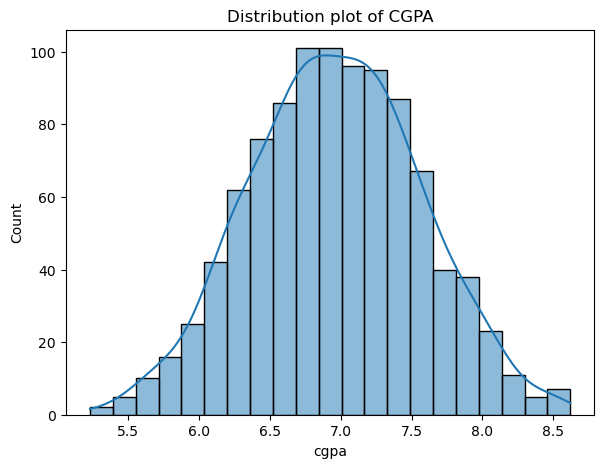

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Distribution plot of CGPA")
sns.histplot(IsPlaced_DF_CGPA.cgpa,kde=True)

In [81]:
# Apply the same formnula for skewed data.

In [63]:
IsPlaced_DF[IsPlaced_DF.placement_exam_marks > Highest_Allowed_Value_PEM].shape

(8, 3)

In [61]:
IsPlaced_DF[IsPlaced_DF.placement_exam_marks < Lowest_Allowed_Value_PEM]

,cgpa,placement_exam_marks,placed


In [65]:
temp_df = IsPlaced_DF.copy()

In [67]:
temp_df = IsPlaced_DF[(IsPlaced_DF.placement_exam_marks < Highest_Allowed_Value_PEM) & (IsPlaced_DF.placement_exam_marks > Lowest_Allowed_Value_PEM)]

In [69]:
temp_df.shape

(992, 3)

<Axes: title={'center': 'Distribution plot of Placement Exam Marks'}, xlabel='placement_exam_marks', ylabel='Count'>

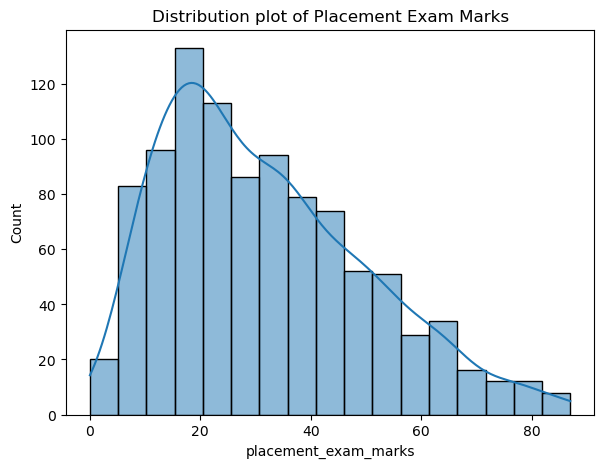

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
'''
plt.subplot(1,2,1)
plt.title("Distribution plot of CGPA")
sns.histplot(IsPlaced_DF.cgpa,kde=True)'''

plt.subplot(1,2,1)
plt.title("Distribution plot of Placement Exam Marks")
sns.histplot(temp_df.placement_exam_marks,kde=True)

In [85]:
temp_df.placement_exam_marks.skew()

0.7240892372721492

<Axes: xlabel='placement_exam_marks'>

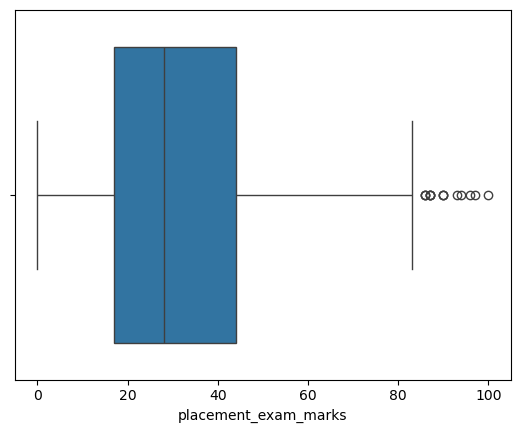

In [89]:
# Draw the boxplot for placement_exam_marks

sns.boxplot(x=IsPlaced_DF.placement_exam_marks)

In [95]:
# Calculate the highest and lowest allowed values using the IQR - This will work for Skwed data
# Q1 -/+ 1.5*IQR 
# IQR = Q3 - Q1

PEM_Q1 = IsPlaced_DF.placement_exam_marks.quantile(0.25)
PEM_Q3 = IsPlaced_DF.placement_exam_marks.quantile(0.75)
IQR = PEM_Q3 - PEM_Q1

LowerLimitOutlier = PEM_Q1 - 1.5*IQR
print('LowerLimitOutlier is ',LowerLimitOutlier)

UpperLimitOutlier = PEM_Q3 + 1.5*IQR
print('UpperLimitOutlier is ',UpperLimitOutlier)

LowerLimitOutlier is  -23.5
UpperLimitOutlier is  84.5


In [127]:
# Now delete the values not this in range from placement_exam_marks >>> Trimming, create a new DF

IsPlaced_DF_PEM = IsPlaced_DF[(IsPlaced_DF.placement_exam_marks > LowerLimitOutlier) & (IsPlaced_DF.placement_exam_marks < UpperLimitOutlier)]
#IsPlaced_DF[(IsPlaced_DF.placement_exam_marks > LowerLimitOutlier) & (IsPlaced_DF.placement_exam_marks < UpperLimitOutlier)]

In [115]:
IsPlaced_DF_PEM.placement_exam_marks.skew()
# Skewness reduced after removing the outliers..

0.6549925627115251

In [117]:
IsPlaced_DF.placement_exam_marks.skew()

0.8356419499466834

<Axes: xlabel='placement_exam_marks'>

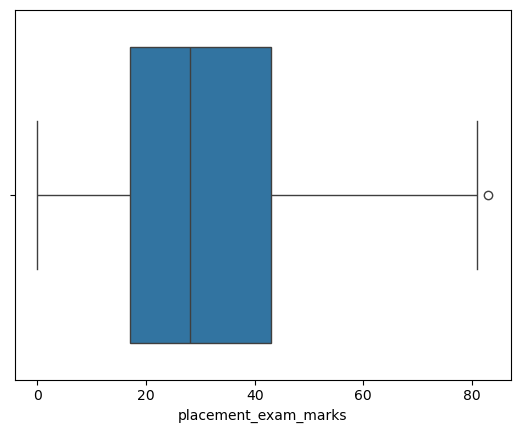

In [111]:
# Draw the boxplot for placement_exam_marks

sns.boxplot(x=IsPlaced_DF_PEM.placement_exam_marks)

<Axes: title={'center': 'Distribution plot of placement_exam_marks'}, xlabel='placement_exam_marks', ylabel='Count'>

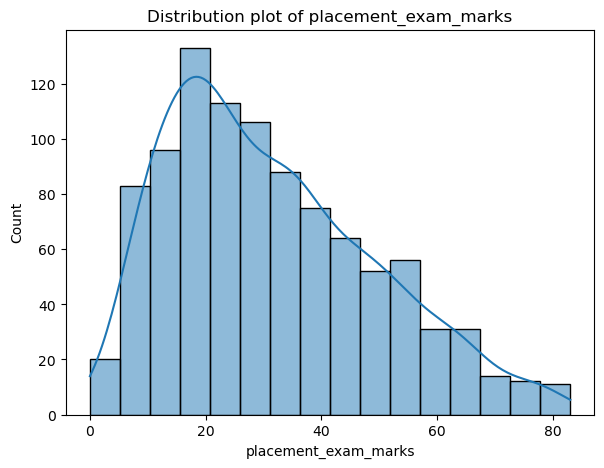

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Distribution plot of placement_exam_marks")
sns.histplot(IsPlaced_DF_PEM.placement_exam_marks,kde=True)

In [129]:
### Outlier detection using Percentile - could be 1Percentile or any value
### Capping with percentile is Winsorisation

In [131]:
IsPlaced_DF.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


<Axes: xlabel='cgpa'>

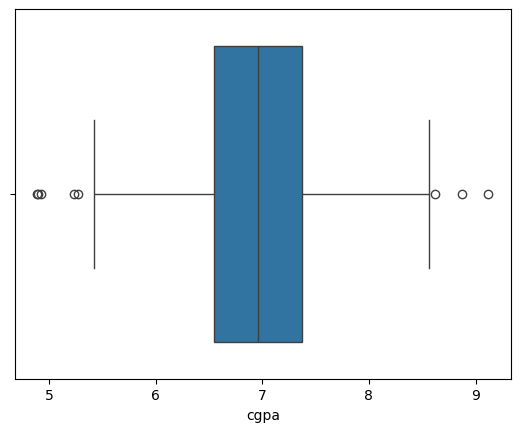

In [159]:
sns.boxplot(x=IsPlaced_DF.cgpa)

In [143]:
# Consider 1% as the outlier range

UpperLimitAllowed = IsPlaced_DF.cgpa.quantile(0.99)
LowerLimitAllowed = IsPlaced_DF.cgpa.quantile(0.01)

In [153]:
# Filter records based on upper and lower limits

IsPlaced_DF_Quantile1 = IsPlaced_DF[(IsPlaced_DF.cgpa > LowerLimitAllowed) & (IsPlaced_DF.cgpa < UpperLimitAllowed)]
IsPlaced_DF_Quantile1.shape

(980, 3)

<Axes: xlabel='cgpa'>

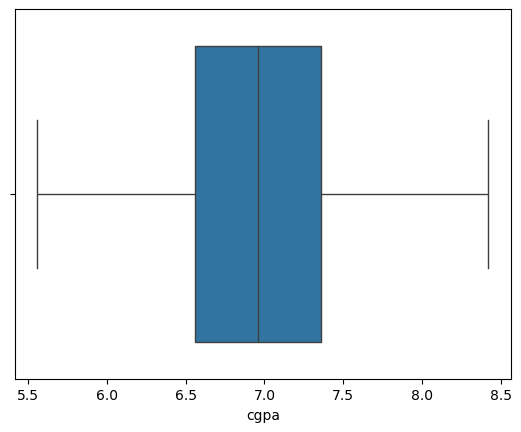

In [157]:
sns.boxplot(x=IsPlaced_DF_Quantile1.cgpa)

In [161]:
IsPlaced_DF_Quantile1.describe()

,cgpa,placement_exam_marks,placed
count,980.000000,980.000000,980.000000
mean,6.961745,32.225510,0.485714
std,0.573327,19.164765,0.500051
min,5.560000,0.000000,0.000000
25%,6.557500,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.360000,44.000000,1.000000
max,8.420000,100.000000,1.000000


In [163]:
IsPlaced_DF.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [167]:
LowerLimitAllowed

5.5596

In [169]:
UpperLimitAllowed

8.4201

In [175]:
IsPlaced_DF_Quantile1WinsorCap.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


In [263]:
IsPlaced_DF_Quantile1WinsorCap.head(1)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1


In [185]:
# Instead of dropping, cap the values - Winsorization

IsPlaced_DF_Quantile1WinsorCap = IsPlaced_DF.copy()

import numpy as np
IsPlaced_DF_Quantile1WinsorCap['cgpa'] = np.where(IsPlaced_DF_Quantile1WinsorCap.cgpa < LowerLimitAllowed, LowerLimitAllowed,
                                               (np.where(IsPlaced_DF_Quantile1WinsorCap.cgpa > UpperLimitAllowed,UpperLimitAllowed,IsPlaced_DF_Quantile1WinsorCap.cgpa)))

In [187]:
IsPlaced_DF_Quantile1WinsorCap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.962307,32.225000,0.489000
std,0.602571,19.130822,0.500129
min,5.559600,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.420100,100.000000,1.000000


<Axes: xlabel='cgpa'>

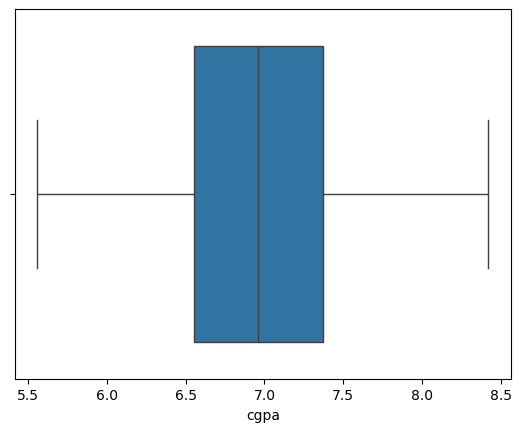

In [189]:
sns.boxplot(x=IsPlaced_DF_Quantile1WinsorCap.cgpa)

In [275]:
test = IsPlaced_DF.copy()
test.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


### Capping using Winsorization

In [366]:
from scipy.stats.mstats import winsorize

wd = winsorize(test['cgpa'],limits=[0.1,0.3])
test['cgpa_new'] = pd.Series(wd)
test.head(3)
wd

masked_array(data=[7.19, 7.29, 7.29, 6.42, 7.23, 7.29, 6.69, 7.12, 6.45,
                   7.29, 6.82, 6.38, 6.58, 6.19, 7.29, 7.1 , 6.53, 7.29,
                   6.93, 7.29, 6.69, 7.29, 6.76, 6.19, 6.44, 6.28, 7.29,
                   6.53, 7.23, 6.51, 7.29, 7.29, 6.19, 6.23, 7.29, 7.29,
                   6.85, 7.29, 6.58, 7.25, 6.6 , 6.7 , 7.29, 7.29, 7.29,
                   6.92, 7.29, 6.92, 6.29, 7.29, 6.2 , 6.24, 7.29, 6.69,
                   7.29, 7.29, 6.93, 7.29, 7.29, 7.29, 7.29, 7.29, 7.29,
                   6.22, 6.98, 6.27, 6.67, 7.29, 6.58, 7.29, 6.98, 6.19,
                   7.29, 6.39, 6.19, 6.77, 7.29, 7.1 , 7.29, 7.29, 6.87,
                   7.12, 7.22, 7.29, 6.19, 6.19, 7.19, 6.96, 6.78, 6.56,
                   7.29, 7.29, 6.48, 7.  , 7.15, 6.89, 7.09, 7.29, 7.29,
                   7.29, 6.56, 6.48, 6.19, 6.44, 6.82, 6.72, 6.59, 7.29,
                   6.19, 7.23, 6.96, 6.48, 7.23, 7.24, 6.3 , 7.28, 7.16,
                   7.11, 6.9 , 7.  , 6.99, 6.19, 6.

In [364]:
test.cgpa.quantile(0.3)

6.64